# Machine learning Case Study: Credit card consumption of customers.

**Importing the packages.**

In [88]:
# import the libraries

#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Modules related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
#from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor#, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
#from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

In [89]:
Cust_demo = pd.read_excel('CustomerDemographics.xlsx')
Cust_behaviour_data = pd.read_excel('CustomerBehaviorData.xlsx')
Cred_consumption_data = pd.read_excel('CreditConsumptionData.xlsx')

In [90]:
#Checking the unique IDs in the data for July, August and September.
Cred_consumption_data.ID.nunique()

20000

In [91]:
# Merging the datasets of Customer credit card spending behaviour and the Credit card consumption data.
Customer_data = pd.merge(Cust_behaviour_data,Cred_consumption_data , how = 'inner',left_on = 'ID',right_on = 'ID')
Customer_data

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.20,130000.00,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84,13434.0
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.00,3.00,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69,449.0
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.00,176487.60,2156.0,3735.0,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90,11968.0
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.00,63000.00,26241.0,0.0,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61,32029.0
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.20,7216.53,13873.0,-4679.0,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89,16394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,2,26,595000,1,1,1.0,1,84446.00,961916.90,492.0,553.0,41314.91,37646.41,6.0,14,27825.0,34952.75,45461.00,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88,NaN
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,1,58,13000,1,1,1.0,1,1892440.00,295150.90,10271.0,20324.0,216.25,1605.00,32.0,26,27912.0,17261.41,85422.00,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30,NaN
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,2,17,124000,1,1,1.0,1,115.45,200015.58,30000.0,6885.0,89327.00,80044.00,32.0,14,14580.0,142002.00,68985.86,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34,NaN
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,44,67,371000,1,1,1.0,1,48796.45,1631.11,925.0,10455.0,191780.00,66057.00,40.0,5,23881.0,156995.05,13558.00,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29,NaN


In [6]:
Customer_data.columns

Index(['ID', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active',
       'cc_cons'],
      dtype='object')

In [92]:
pd.set_option('display.max_columns', None)
Customer_data

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.20,130000.00,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84,13434.0
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.00,3.00,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69,449.0
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.00,176487.60,2156.0,3735.0,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90,11968.0
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.00,63000.00,26241.0,0.0,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61,32029.0
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.20,7216.53,13873.0,-4679.0,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89,16394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,2,26,595000,1,1,1.0,1,84446.00,961916.90,492.0,553.0,41314.91,37646.41,6.0,14,27825.0,34952.75,45461.00,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88,NaN
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,1,58,13000,1,1,1.0,1,1892440.00,295150.90,10271.0,20324.0,216.25,1605.00,32.0,26,27912.0,17261.41,85422.00,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30,NaN
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,2,17,124000,1,1,1.0,1,115.45,200015.58,30000.0,6885.0,89327.00,80044.00,32.0,14,14580.0,142002.00,68985.86,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34,NaN
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,44,67,371000,1,1,1.0,1,48796.45,1631.11,925.0,10455.0,191780.00,66057.00,40.0,5,23881.0,156995.05,13558.00,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29,NaN


In [93]:
# Merging the datasets of Customer credit card consumption data and Customer demographics.
Credit_card_data = pd.merge(Customer_data, Cust_demo , how = 'inner', left_on = 'ID',right_on = 'ID') 
Credit_card_data

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.20,130000.00,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84,13434.0,current,M,30,MEDIUM,7.0,5,956.0,1,20.0
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.00,3.00,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69,449.0,current,M,37,LOW,10.2,8,966.0,1,5.0
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.00,176487.60,2156.0,3735.0,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90,11968.0,current,M,33,MEDIUM,3.9,3,505.0,1,15.0
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.00,63000.00,26241.0,0.0,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61,32029.0,current,M,63,LOW,25.8,6,631.0,0,15.0
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.20,7216.53,13873.0,-4679.0,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89,16394.0,saving,M,33,MEDIUM,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,2,26,595000,1,1,1.0,1,84446.00,961916.90,492.0,553.0,41314.91,37646.41,6.0,14,27825.0,34952.75,45461.00,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88,NaN,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,1,58,13000,1,1,1.0,1,1892440.00,295150.90,10271.0,20324.0,216.25,1605.00,32.0,26,27912.0,17261.41,85422.00,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30,NaN,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,2,17,124000,1,1,1.0,1,115.45,200015.58,30000.0,6885.0,89327.00,80044.00,32.0,14,14580.0,142002.00,68985.86,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34,NaN,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,44,67,371000,1,1,1.0,1,48796.45,1631.11,925.0,10455.0,191780.00,66057.00,40.0,5,23881.0,156995.05,13558.00,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29,NaN,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


# Segregating the merged data into train and test datasets.

In [94]:
Cred_consumption_train = Credit_card_data[Credit_card_data.cc_cons.isnull() == 0]
Cred_consumption_train

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.200,130000.00,300500.0,12174.00000,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.00,Y,3448.84,13434.0,current,M,30,MEDIUM,7.0,5,956.0,1,20.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.000,3.00,610000.0,2351.00000,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.00,Y,3812.69,449.0,current,M,37,LOW,10.2,8,966.0,1,5.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.000,176487.60,2156.0,3735.00000,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.00,Y,9432.90,11968.0,current,M,33,MEDIUM,3.9,3,505.0,1,15.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.000,63000.00,26241.0,0.00000,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.00,Y,144.61,32029.0,current,M,63,LOW,25.8,6,631.0,0,15.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.200,7216.53,13873.0,-4679.00000,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.00,Y,1887.89,16394.0,saving,M,33,MEDIUM,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,55,29,520000,1,1,1.0,1,186189.000,24000.00,16215.0,977.00000,30608.54,31135.00,79.0,2,27608.0,30501.77,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,Y,78966.76,4263.0,current,F,53,LOW,13.2,9,653.0,1,20.0
14996,10376,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,1,2,472000,1,1,1.0,1,24832.000,221000.00,12337.0,-6281.37988,39903.00,23797.00,43.0,2,30512.0,57918.69,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,Y,4762.10,11019.0,current,M,44,MEDIUM,2.4,9,535.0,1,2.0
14997,2181,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,3,3,44000,1,1,1.0,1,180615.020,253000.00,25000.0,10210.00000,29525.63,95477.27,4.0,1,41085.0,25404.75,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,Y,2877.33,404227.0,current,M,37,MEDIUM,3.4,9,464.0,1,8.0
14998,18417,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,9,1,359000,1,1,1.0,1,3299447.136,393982.10,3975.0,-4664.00000,119370.54,59644.00,3.0,29,19110.0,46086.90,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,Y,13006.84,28813.0,current,M,220,MEDIUM,40.0,10,536.0,1,3.0


In [95]:
Cred_consumption_test = Credit_card_data[Credit_card_data.cc_cons.isnull() == 1]
Cred_consumption_test

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,17591,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,56,6,125000,1,1,1.0,1,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36,24485.0,23512.67,41755.00,24,20,9750.0,30527.88,31271.00,3,12,25945.92,Y,1170.49,NaN,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
15001,13541,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,38,31,59000,1,1,1.0,1,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5,3375.0,15049.44,130299.00,43,40,16967.0,14342.83,16582.00,6,39,12214.00,Y,16447.45,NaN,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
15002,13431,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,27,2,49999,1,1,1.0,1,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6,14950.0,133659.00,40422.00,42,35,36398.0,32503.16,33539.54,5,9,13215.00,Y,2622.28,NaN,current,M,53,LOW,33.0,10,324.0,1,15.0
15003,8687,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,1,11,520000,1,1,1.0,1,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1,235844.0,99686.03,48148.00,3,5,97825.0,93572.42,109429.75,21,0,72317.00,Y,340.79,NaN,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
15004,14727,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,25,1,152000,1,1,1.0,1,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1,14495.0,190374.25,25926.00,70,75,27936.0,19011.50,41401.00,6,35,42344.00,Y,2812.20,NaN,current,M,62,LOW,12.6,9,505.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,2,26,595000,1,1,1.0,1,84446.00,961916.90,492.0,553.00000,41314.91,37646.41,6.0,14,27825.0,34952.75,45461.00,35,11,32944.0,105488.53,125470.83,21,50,58037.00,Y,7870.88,NaN,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,1,58,13000,1,1,1.0,1,1892440.00,295150.90,10271.0,20324.00000,216.25,1605.00,32.0,26,27912.0,17261.41,85422.00,5,8,8850.0,77112.66,86559.00,62,38,24110.00,Y,3668.30,NaN,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,2,17,124000,1,1,1.0,1,115.45,200015.58,30000.0,6885.00000,89327.00,80044.00,32.0,14,14580.0,142002.00,68985.86,10,108,35819.0,57192.48,80627.00,2,18,1769.00,Y,5450.34,NaN,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,44,67,371000,1,1,1.0,1,48796.45,1631.11,925.0,10455.00000,191780.00,66057.00,40.0,5,23881.0,156995.05,13558.00,11,12,39083.0,82039.00,24332.00,117,64,37255.00,Y,59.29,NaN,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


# Data Preparation

In [11]:
Cred_consumption_train.shape

(15000, 49)

In [12]:
Cred_consumption_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   cc_cons_apr                   15000 non-null  float64
 2   dc_cons_apr                   15000 non-null  float64
 3   cc_cons_may                   15000 non-null  float64
 4   dc_cons_may                   15000 non-null  float64
 5   cc_cons_jun                   15000 non-null  float64
 6   dc_cons_jun                   15000 non-null  float64
 7   cc_count_apr                  14999 non-null  float64
 8   cc_count_may                  15000 non-null  int64  
 9   cc_count_jun                  15000 non-null  int64  
 10  dc_count_apr                  15000 non-null  int64  
 11  dc_count_may                  15000 non-null  int64  
 12  dc_count_jun                  15000 non-null  int64  
 13  c

In [96]:
Cred_consumption_train.describe().round(2)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
count,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,14999.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.0,15000.0,14999.0,15000.0,15000.00,15000.00,14998.00,15000.00,15000.00,15000.00,14999.0,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,14999.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,14999.00
mean,10032.08,17957.39,8171.10,16337.05,7703.61,12129.01,7097.40,41.49,33.49,41.51,17.17,13.98,30.29,277005.15,1.0,1.0,1.0,1.0,619414.04,233364.16,44440.94,3523.05,68234.21,80797.61,36.4,11.29,54389.54,65544.92,83569.35,11.92,41.00,57187.91,76159.87,78503.16,19.95,44.65,52586.54,15761.39,55157.73,47.79,15.18,5.51,598.42,0.72,11.05
std,5760.37,25187.94,14773.03,27060.85,18987.30,18488.78,13251.70,97.44,49.54,47.34,19.36,17.09,29.25,179429.54,0.0,0.0,0.0,0.0,3087814.83,407323.72,88117.93,7373.36,112678.61,198905.98,30.7,12.67,195094.27,101682.86,177630.05,16.84,40.54,200019.35,154511.21,148200.45,27.20,35.09,128260.09,117919.12,97670.97,30.63,20.31,2.87,220.06,0.45,5.49
min,1.00,253.00,19.35,157.00,22.00,65.00,62.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.0,1.0,1.0,1.0,0.30,3.00,462.00,-12179.00,4.01,61.38,0.0,0.00,1.00,28.20,10.61,0.00,0.00,0.25,5.23,11.88,1.00,0.00,0.06,0.00,0.00,25.00,0.50,1.00,123.00,0.00,2.00
25%,5060.50,4411.03,1634.00,3638.00,1643.50,3004.50,1358.75,5.00,8.00,10.00,2.00,2.00,4.00,124000.00,1.0,1.0,1.0,1.0,6100.00,38173.00,2214.00,0.00,23230.43,26846.00,11.0,2.00,20683.00,21003.33,25410.27,2.00,11.00,20083.00,25732.59,24920.08,4.00,12.00,19038.00,1549.35,6768.00,33.00,5.10,3.00,424.00,0.00,6.00
50%,10054.00,10288.10,3996.90,8695.03,3820.50,6655.25,3327.00,10.00,23.00,35.00,7.00,5.00,17.00,272000.00,1.0,1.0,1.0,1.0,45036.00,111000.00,13873.00,2351.00,41875.60,47097.00,32.0,5.00,31915.00,38235.68,48140.00,4.00,23.00,31403.00,45803.65,45900.00,7.00,38.00,30425.50,3955.28,13364.00,40.00,9.90,6.00,623.00,1.00,11.00
75%,15015.25,21405.00,9339.02,18951.30,8212.00,14247.00,7597.00,44.00,43.00,61.00,25.00,21.00,54.00,400000.00,1.0,1.0,1.0,1.0,161704.00,245000.00,48950.00,6885.00,75368.30,85935.00,52.0,19.00,52559.00,74400.55,94569.36,11.00,69.00,55986.00,84619.10,85592.33,21.00,73.00,53211.00,9376.39,20105.75,53.00,18.00,8.00,799.00,1.00,16.00
max,19998.00,441031.33,229255.00,1117246.31,911223.49,382914.10,233384.00,531.00,601.00,653.00,82.00,71.00,98.00,1000000.00,1.0,1.0,1.0,1.0,65977430.00,5000000.00,610000.00,35346.00,5156863.79,10592125.00,147.0,78.00,12029154.00,4252567.00,10601749.00,71.00,171.00,10000000.00,6539809.92,6611953.00,117.00,133.00,5200000.00,7447125.13,408382.00,223.00,203.00,10.00,974.00,1.00,20.00


**Checking the null values in the columns and drop the rows if nullvalues are found in any row.**
**Here we can fill the missing values in the object type data points with the column mode and**
**we can fill the missing data points of int64 and float64 type with median values.**

In [97]:
Cred_consumption_train.isnull().sum()

#Creating a user defined function to fill in the missing values.
def missing_imputations(x):
    if x.dtype == 'object':
        x = x.fillna(x.mode()[0])
    else:
        x = x.fillna(x.median())
        return x
    
Cred_consumption_train.apply(missing_imputations)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.200,130000.00,300500.0,12174.00000,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.00,None,3448.84,13434.0,None,None,30,None,7.0,5,956.0,1,20.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.000,3.00,610000.0,2351.00000,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.00,None,3812.69,449.0,None,None,37,None,10.2,8,966.0,1,5.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.000,176487.60,2156.0,3735.00000,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.00,None,9432.90,11968.0,None,None,33,None,3.9,3,505.0,1,15.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.000,63000.00,26241.0,0.00000,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.00,None,144.61,32029.0,None,None,63,None,25.8,6,631.0,0,15.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.200,7216.53,13873.0,-4679.00000,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.00,None,1887.89,16394.0,None,None,33,None,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,55,29,520000,1,1,1.0,1,186189.000,24000.00,16215.0,977.00000,30608.54,31135.00,79.0,2,27608.0,30501.77,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,None,78966.76,4263.0,None,None,53,None,13.2,9,653.0,1,20.0
14996,10376,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,1,2,472000,1,1,1.0,1,24832.000,221000.00,12337.0,-6281.37988,39903.00,23797.00,43.0,2,30512.0,57918.69,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,None,4762.10,11019.0,None,None,44,None,2.4,9,535.0,1,2.0
14997,2181,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,3,3,44000,1,1,1.0,1,180615.020,253000.00,25000.0,10210.00000,29525.63,95477.27,4.0,1,41085.0,25404.75,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,None,2877.33,404227.0,None,None,37,None,3.4,9,464.0,1,8.0
14998,18417,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,9,1,359000,1,1,1.0,1,3299447.136,393982.10,3975.0,-4664.00000,119370.54,59644.00,3.0,29,19110.0,46086.90,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,None,13006.84,28813.0,None,None,220,None,40.0,10,536.0,1,3.0


In [98]:
Cred_consumption_train.investment_4.isna().sum()

0

In [99]:
#Checking and removing the duplicates in the data if any.
Cred_consumption_train.duplicated()
Cred_consumption_train.duplicated().sum()/Cred_consumption_train.duplicated().count()

0.0

In [17]:
Cred_consumption_train.select_dtypes(include = 'object')

,loan_enq,account_type,gender,Income
0,Y,current,M,MEDIUM
1,Y,current,M,LOW
2,Y,current,M,MEDIUM
3,Y,current,M,LOW
4,Y,saving,M,MEDIUM
...,...,...,...,...
14995,Y,current,F,LOW
14996,Y,current,M,MEDIUM
14997,Y,current,M,MEDIUM
14998,Y,current,M,MEDIUM


In [100]:
Cred_consumption_train.loan_enq.nunique()

#Removing the loan _enquiry column from the training dataset as it does not show any variation since all the values are Yes.

Cred_consumption_train = Cred_consumption_train.drop(columns = 'loan_enq')

In [101]:
Cred_consumption_train.account_type.value_counts()
print('current_account_percentage = ',round(12727/(12727+2273)*100,2),'%')
print('savings_account_percentage = ',round(2273/(12727+2273)*100,2),'%')

current_account_percentage =  84.85 %
savings_account_percentage =  15.15 %


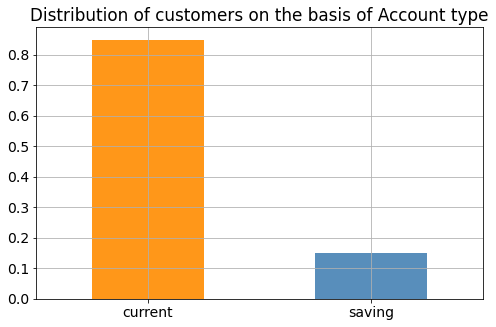

The above plot shows a distribution of around 84:16 between current account holders and savings account holders respectively.


In [102]:
fig = plt.figure(figsize = (8,5))
Cred_consumption_train.account_type.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Distribution of customers on the basis of Account type')
plt.show()
print('The above plot shows a distribution of around 84:16 between current account holders and savings account holders respectively.')

In [103]:
Cred_consumption_train.gender.value_counts()
print('male_percentage = ',round(12945/(12945+2055)*100,2),'%')
print('female_percentage = ',round(2055/(12945+2055)*100,2),'%')

male_percentage =  86.3 %
female_percentage =  13.7 %


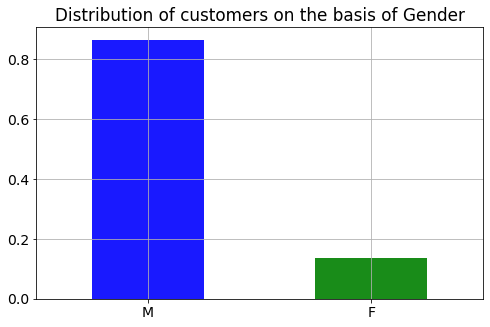

The above plot shows a distribution of around 86:14 between male account holders and female account holders respectively.


In [104]:
fig = plt.figure(figsize = (8,5))
Cred_consumption_train.gender.value_counts(normalize = True).plot(kind='bar', color= ['blue','green'], alpha = 0.9, rot=0)
plt.title('Distribution of customers on the basis of Gender')
plt.show()
print('The above plot shows a distribution of around 86:14 between male account holders and female account holders respectively.')

In [105]:
Cred_consumption_train.Income.value_counts()
print('Medium_income_percentage = ',round(9612/(15000)*100,2),'%')
print('Low_income_percentage =',round(4188/(15000)*100,2),'%')
print('High_income_percentage =',round(1200/(15000)*100,2),'%')

Medium_income_percentage =  64.08 %
Low_income_percentage = 27.92 %
High_income_percentage = 8.0 %


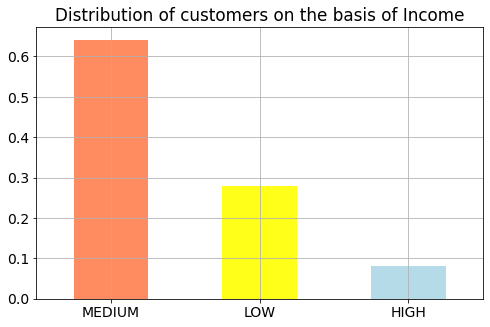

The medium income level customers makes up 64% of the total customers, around 28% are low income groups and the customers in the High income group level makes up just 8% of the total number of customers.


In [106]:
fig = plt.figure(figsize = (8,5))
Cred_consumption_train.Income.value_counts(normalize = True).plot(kind='bar', color= ['#FF7F50','yellow','lightblue'], alpha = 0.9, rot=0)
plt.title('Distribution of customers on the basis of Income')
plt.show()
print('The medium income level customers makes up 64% of the total customers, around 28% are low income groups and the customers in the High income group level makes up just 8% of the total number of customers.')  

# Treatment of the Outliers.

In [25]:
Cred_consumption_train.columns

Index(['ID', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons',
       'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction'],
      dtype='object')

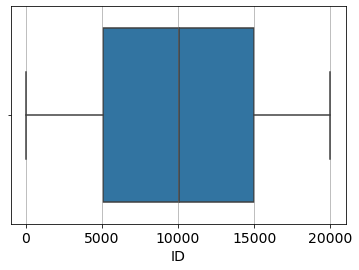

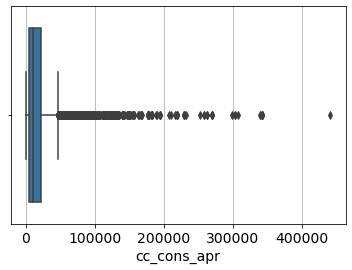

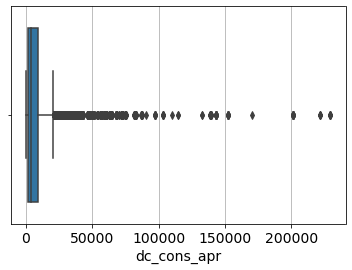

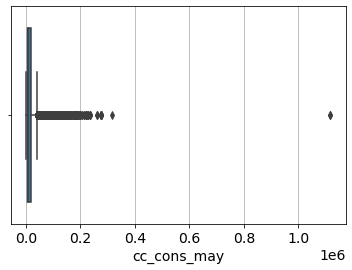

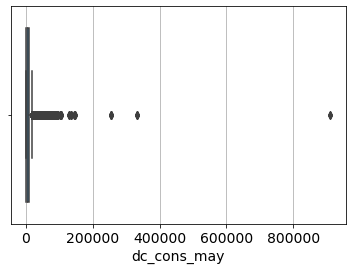

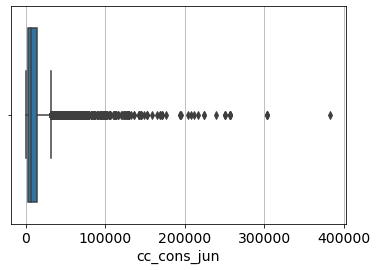

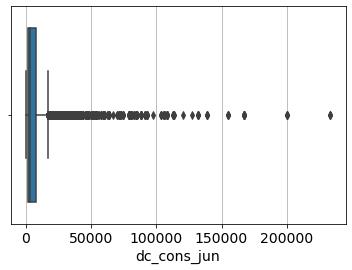

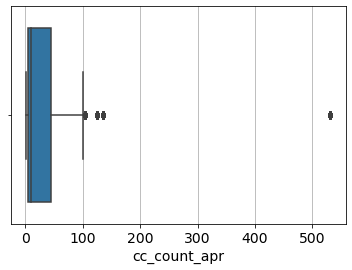

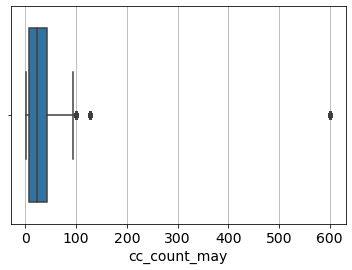

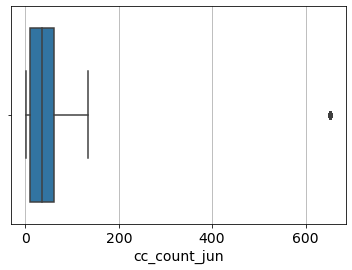

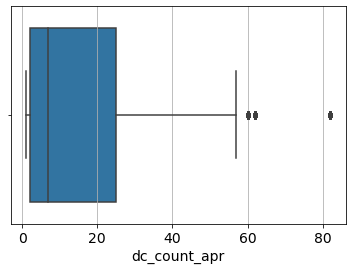

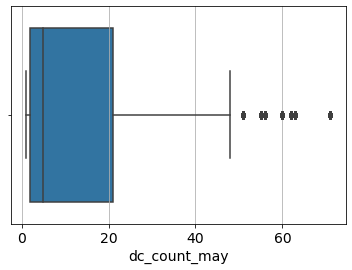

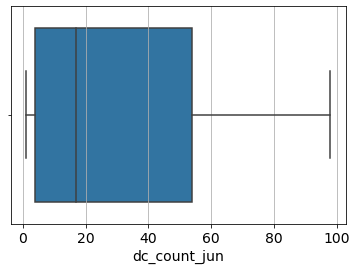

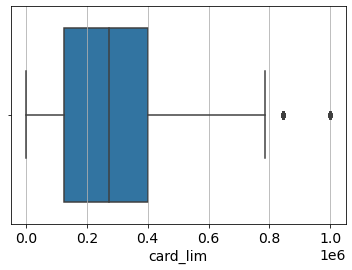

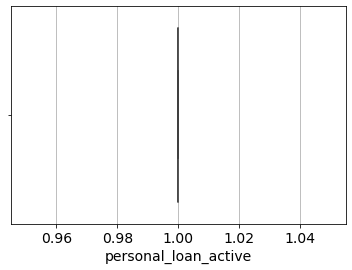

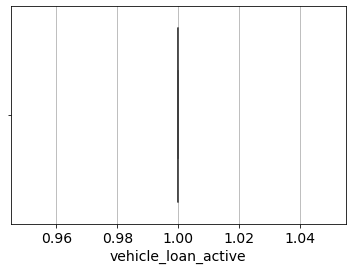

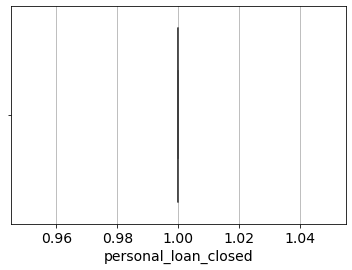

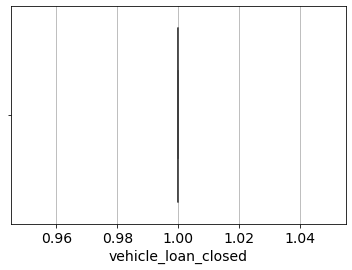

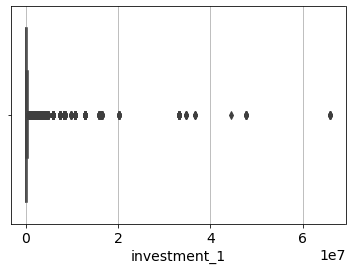

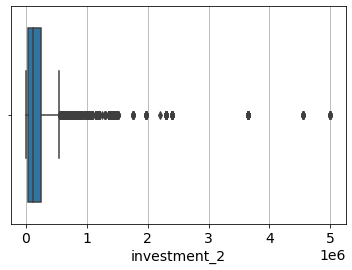

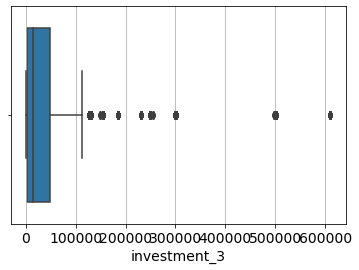

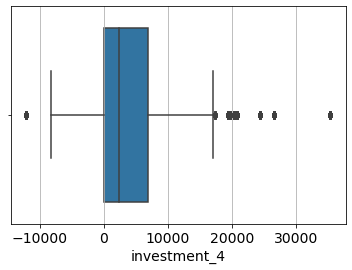

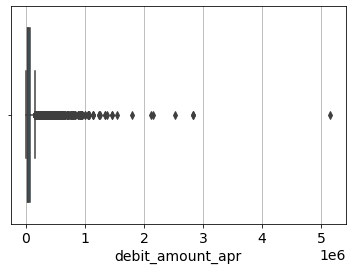

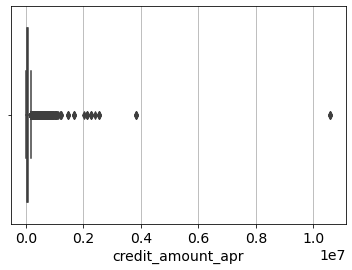

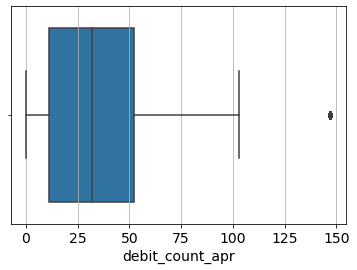

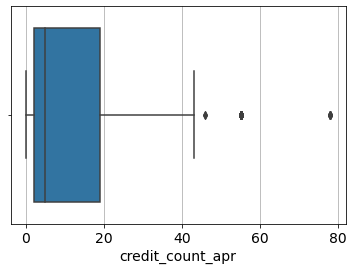

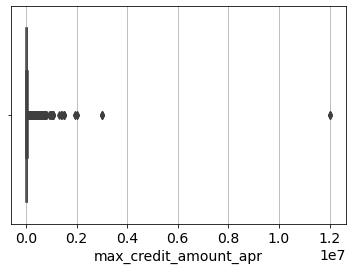

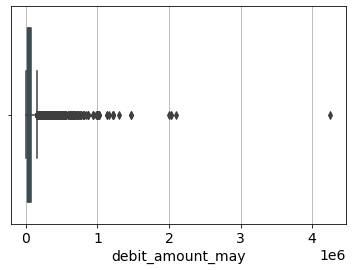

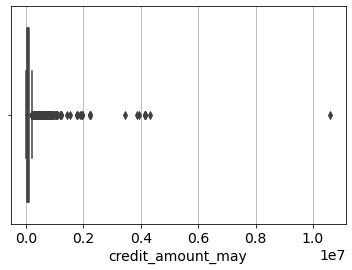

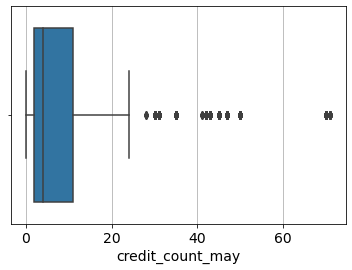

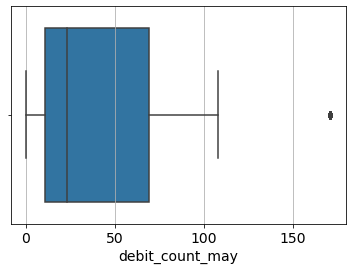

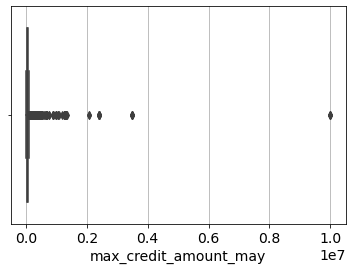

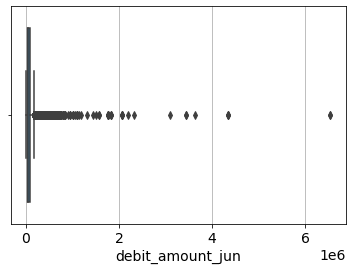

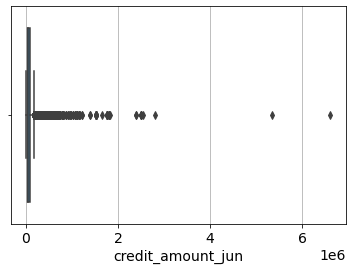

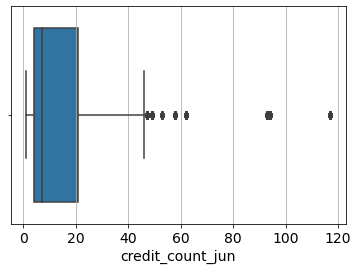

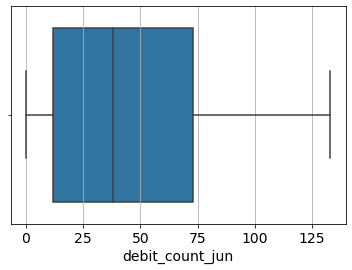

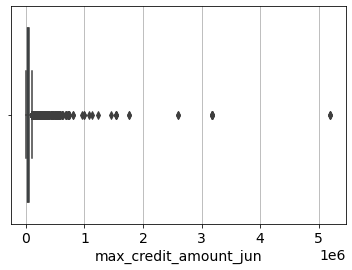

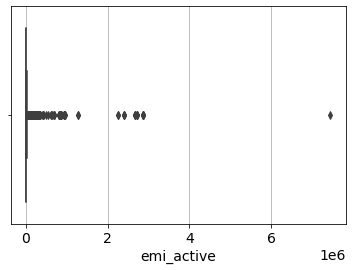

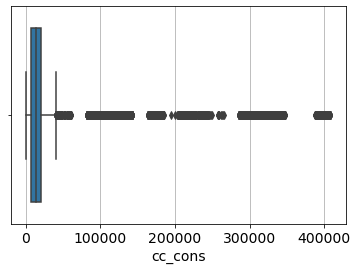

TypeError: Horizontal orientation requires numeric `x` variable.

In [107]:
for col in Cred_consumption_train.columns:
    sns.boxplot(Cred_consumption_train[col])
    plt.show()

**Replacing the nominal categorical data with ordinal continuous values.** 

In [108]:
Cred_consumption_train['gender'].replace({'M': 0 , 'F': 1},inplace = True)

In [109]:
Cred_consumption_train['Income'].replace({'LOW': 0 , 'MEDIUM': 1 , 'HIGH': 2},inplace = True)
Cred_consumption_train['account_type'].replace({'current': 0 , 'saving': 1},inplace = True)

In [110]:
Cred_consumption_train

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.200,130000.00,300500.0,12174.00000,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.00,3448.84,13434.0,0,0,30,1,7.0,5,956.0,1,20.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.000,3.00,610000.0,2351.00000,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.00,3812.69,449.0,0,0,37,0,10.2,8,966.0,1,5.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.000,176487.60,2156.0,3735.00000,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.00,9432.90,11968.0,0,0,33,1,3.9,3,505.0,1,15.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.000,63000.00,26241.0,0.00000,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.00,144.61,32029.0,0,0,63,0,25.8,6,631.0,0,15.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.200,7216.53,13873.0,-4679.00000,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.00,1887.89,16394.0,1,0,33,1,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,55,29,520000,1,1,1.0,1,186189.000,24000.00,16215.0,977.00000,30608.54,31135.00,79.0,2,27608.0,30501.77,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,78966.76,4263.0,0,1,53,0,13.2,9,653.0,1,20.0
14996,10376,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,1,2,472000,1,1,1.0,1,24832.000,221000.00,12337.0,-6281.37988,39903.00,23797.00,43.0,2,30512.0,57918.69,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,4762.10,11019.0,0,0,44,1,2.4,9,535.0,1,2.0
14997,2181,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,3,3,44000,1,1,1.0,1,180615.020,253000.00,25000.0,10210.00000,29525.63,95477.27,4.0,1,41085.0,25404.75,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,2877.33,404227.0,0,0,37,1,3.4,9,464.0,1,8.0
14998,18417,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,9,1,359000,1,1,1.0,1,3299447.136,393982.10,3975.0,-4664.00000,119370.54,59644.00,3.0,29,19110.0,46086.90,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,13006.84,28813.0,0,0,220,1,40.0,10,536.0,1,3.0


In [111]:
Cred_consumption_train_copy = Cred_consumption_train.copy()
Cred_consumption_train_copy

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.200,130000.00,300500.0,12174.00000,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.00,3448.84,13434.0,0,0,30,1,7.0,5,956.0,1,20.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.000,3.00,610000.0,2351.00000,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.00,3812.69,449.0,0,0,37,0,10.2,8,966.0,1,5.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.000,176487.60,2156.0,3735.00000,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.00,9432.90,11968.0,0,0,33,1,3.9,3,505.0,1,15.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.000,63000.00,26241.0,0.00000,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.00,144.61,32029.0,0,0,63,0,25.8,6,631.0,0,15.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.200,7216.53,13873.0,-4679.00000,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.00,1887.89,16394.0,1,0,33,1,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,55,29,520000,1,1,1.0,1,186189.000,24000.00,16215.0,977.00000,30608.54,31135.00,79.0,2,27608.0,30501.77,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,78966.76,4263.0,0,1,53,0,13.2,9,653.0,1,20.0
14996,10376,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,1,2,472000,1,1,1.0,1,24832.000,221000.00,12337.0,-6281.37988,39903.00,23797.00,43.0,2,30512.0,57918.69,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,4762.10,11019.0,0,0,44,1,2.4,9,535.0,1,2.0
14997,2181,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,3,3,44000,1,1,1.0,1,180615.020,253000.00,25000.0,10210.00000,29525.63,95477.27,4.0,1,41085.0,25404.75,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,2877.33,404227.0,0,0,37,1,3.4,9,464.0,1,8.0
14998,18417,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,9,1,359000,1,1,1.0,1,3299447.136,393982.10,3975.0,-4664.00000,119370.54,59644.00,3.0,29,19110.0,46086.90,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,13006.84,28813.0,0,0,220,1,40.0,10,536.0,1,3.0


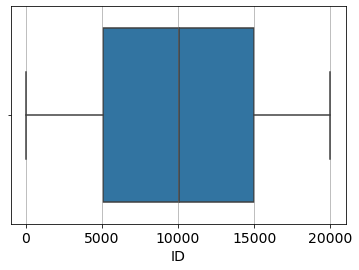

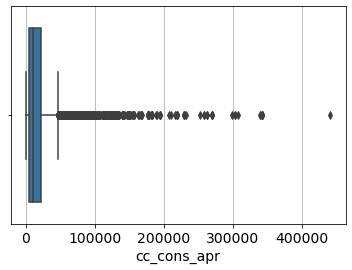

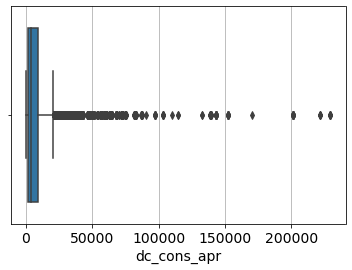

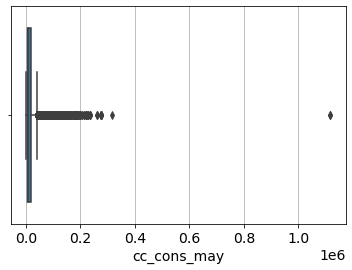

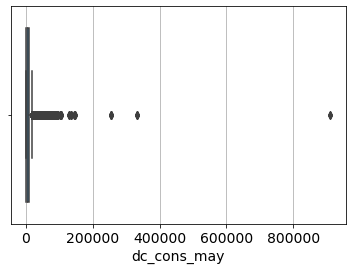

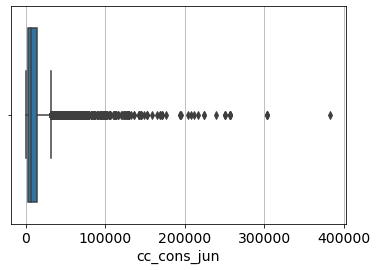

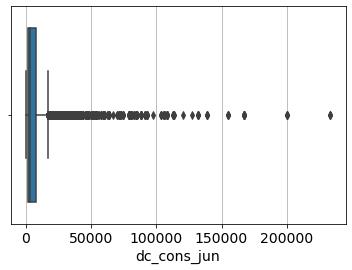

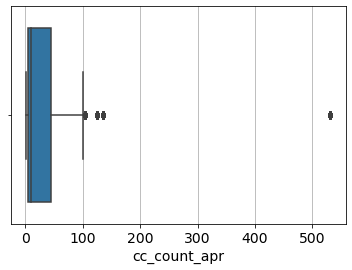

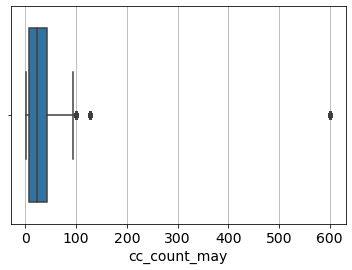

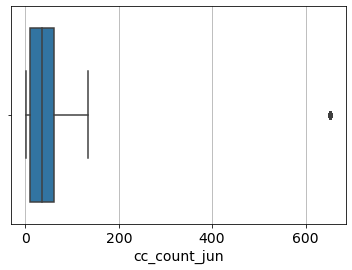

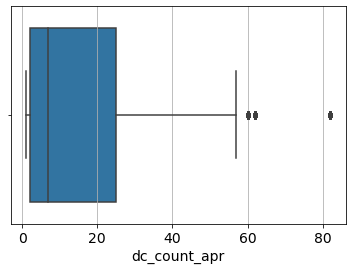

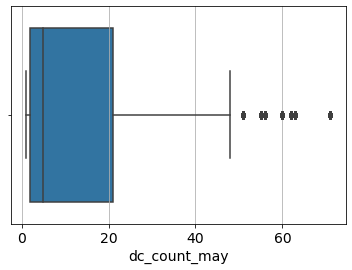

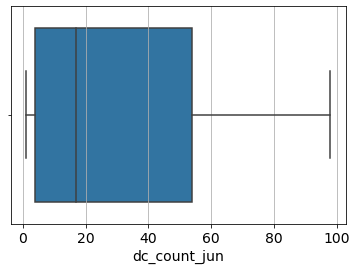

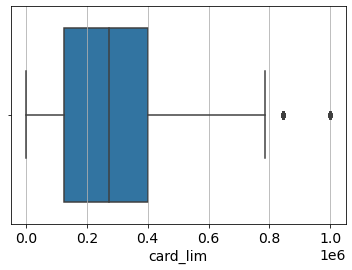

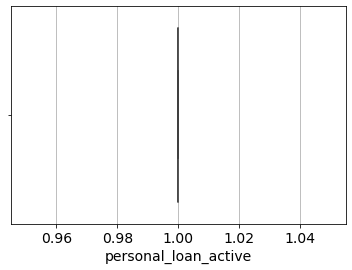

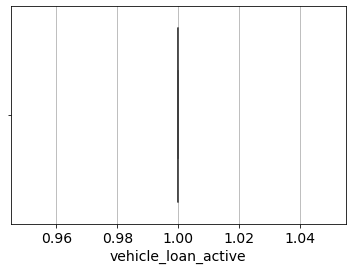

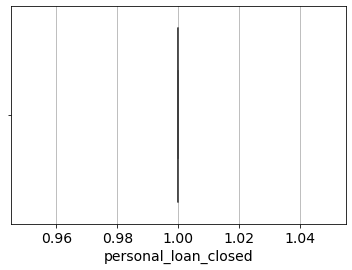

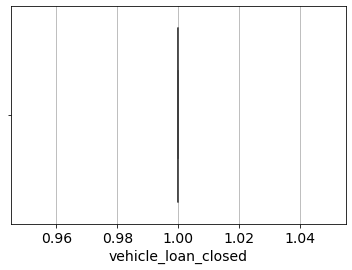

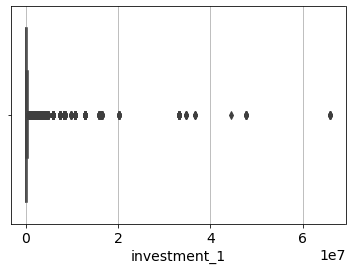

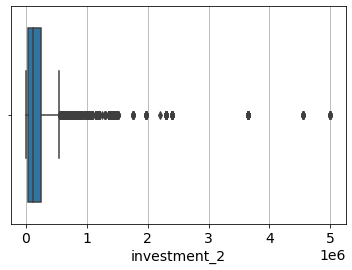

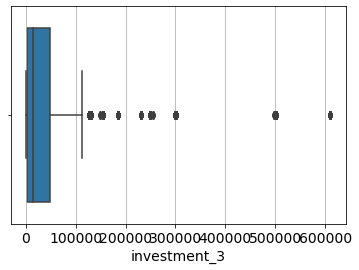

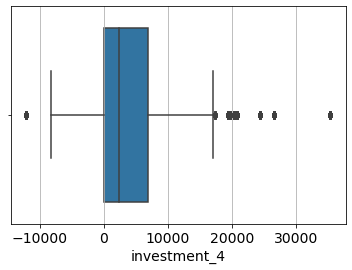

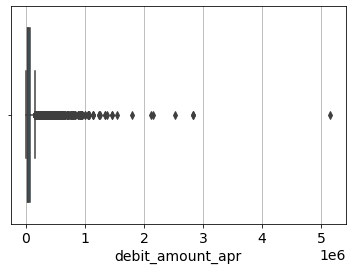

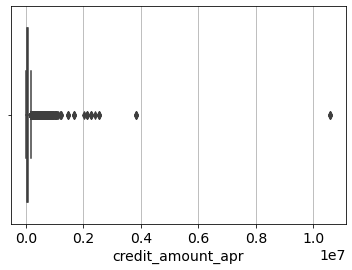

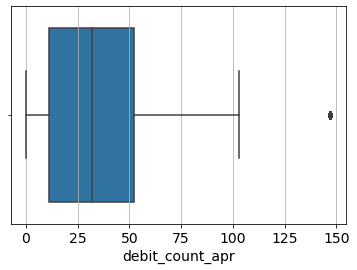

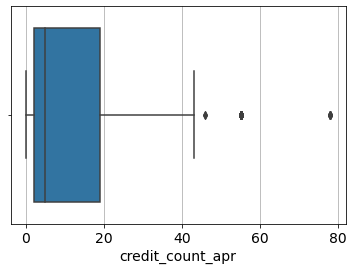

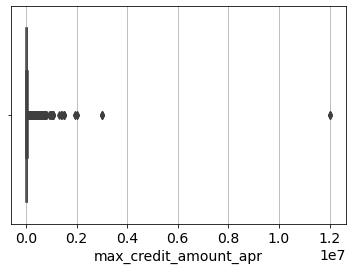

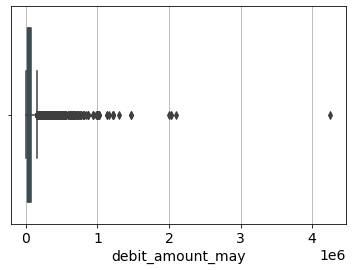

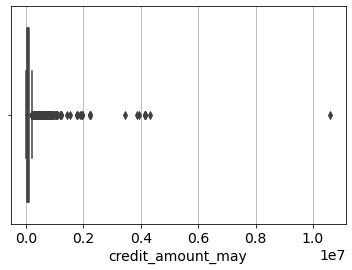

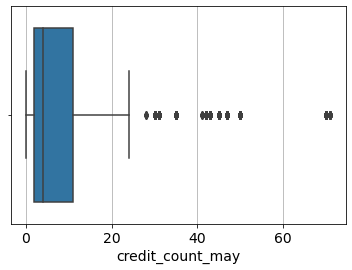

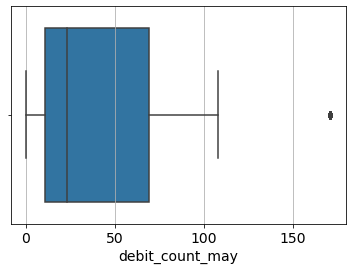

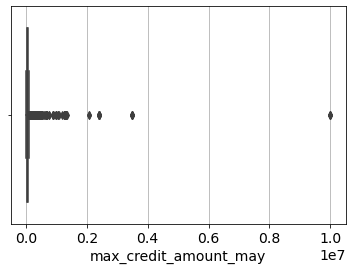

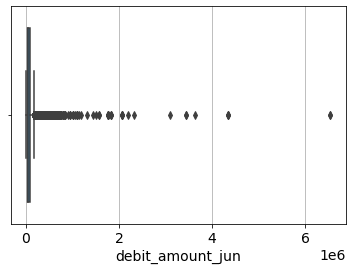

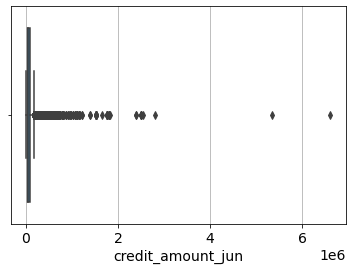

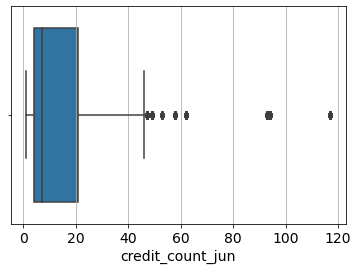

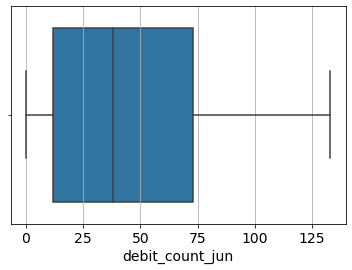

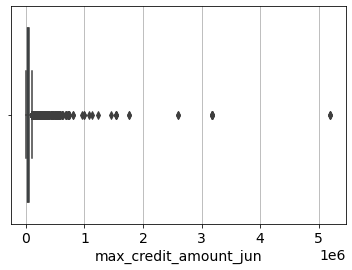

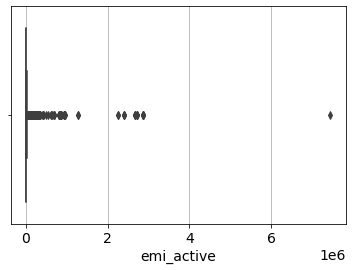

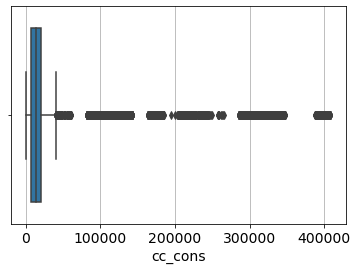

TypeError: Horizontal orientation requires numeric `x` variable.

In [30]:
for col in Cred_consumption_train_copy.columns:
    sns.boxplot(Cred_consumption_train_copy[col])
    plt.show()

# Percentile method to treat the outliers using the boxplots:

<AxesSubplot:>

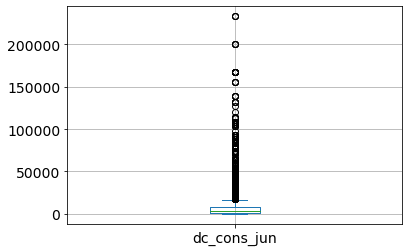

In [31]:
Cred_consumption_train_copy.dc_cons_jun.plot(kind = 'box')

In [32]:
q1 = Cred_consumption_train_copy.dc_cons_jun.quantile(0.25)
q3 = Cred_consumption_train_copy.dc_cons_jun.quantile(0.75)

#finding Inter-quartile value.
iqr = q3 - q1

# finding lower and upper cutoffs for outliers
lc = q1 - (1.5*iqr)
uc = q3 + (1.5*iqr)

# finding the minimum and maximum values
min_val = Cred_consumption_train_copy.dc_cons_jun.min()
max_val = Cred_consumption_train_copy.dc_cons_jun.max()

In [33]:
Cred_consumption_train_copy.dc_cons_jun.quantile(0.99)

71638.0

In [34]:
Cred_consumption_train_copy.dc_cons_jun.quantile(0.01)

188.5

In [112]:
Cred_consumption_train_copy['dc_cons_jun'] = Cred_consumption_train_copy.dc_cons_jun.clip(lower = Cred_consumption_train_copy.dc_cons_jun.quantile(0.01) , upper = Cred_consumption_train_copy.dc_cons_jun.quantile(0.99))


<AxesSubplot:>

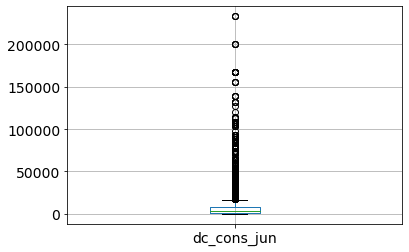

In [113]:
Cred_consumption_train.boxplot(column = 'dc_cons_jun')

#or 
#Cred_consumption_train_copy.dc_cons_jun.plot(kind = 'box')

In [114]:
def outlier_treatment(x):
    x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    return x

In [115]:
Cred_consumption_train_copy = Cred_consumption_train_copy.apply(outlier_treatment)

# Checking the linearity of the variables with the output variable.

In [41]:
Cred_consumption_train_copy.columns

Index(['ID', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons',
       'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction'],
      dtype='object')

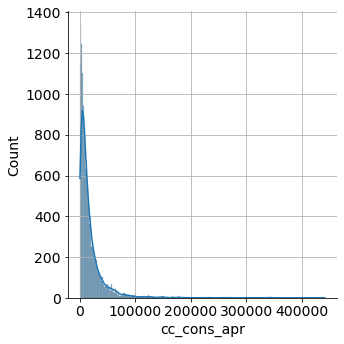

In [42]:
sns.displot(Cred_consumption_train_copy.cc_cons_apr, kde = True)

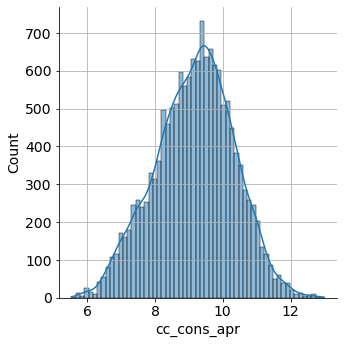

In [43]:
sns.displot(np.log(Cred_consumption_train_copy.cc_cons_apr),kde = True)

**We can see that the independent variables are not showing very well normally distributed plots**
**so we can apply some transformations on the data to make it normally distributed.**


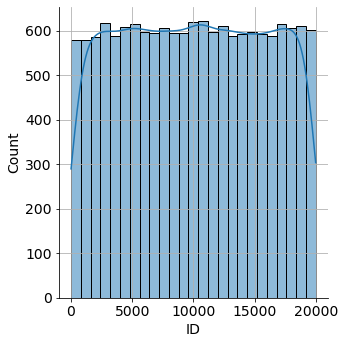

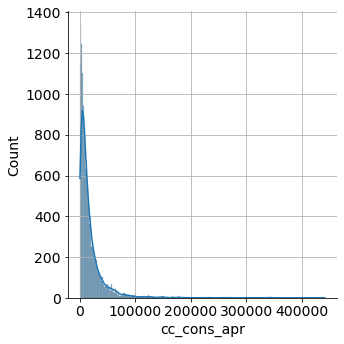

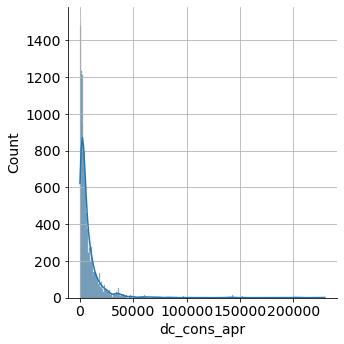

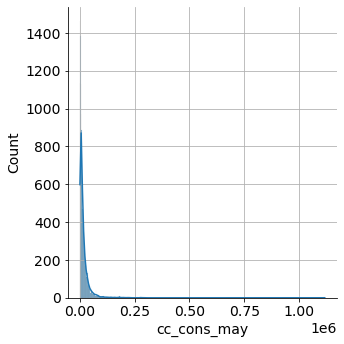

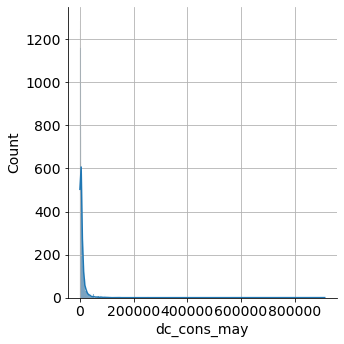

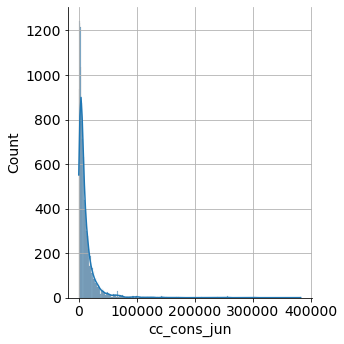

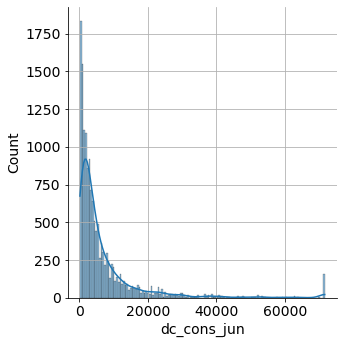

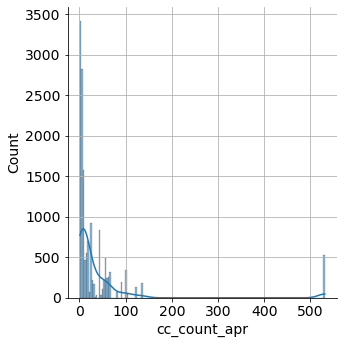

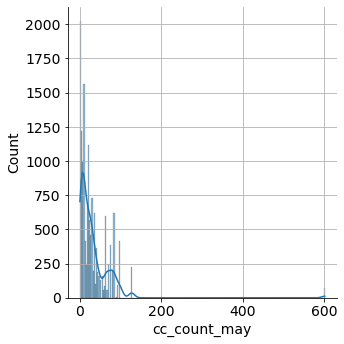

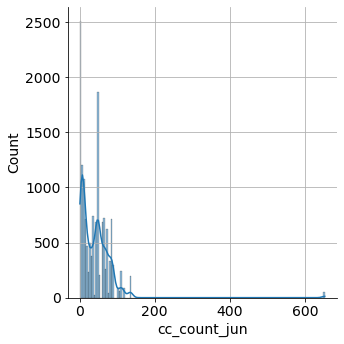

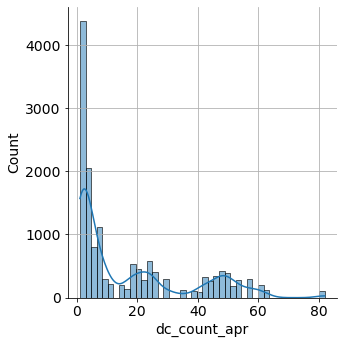

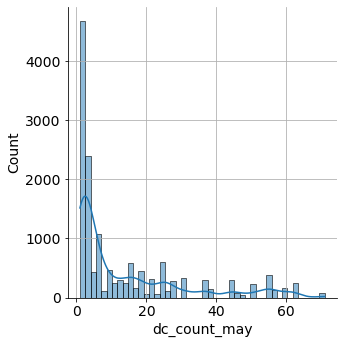

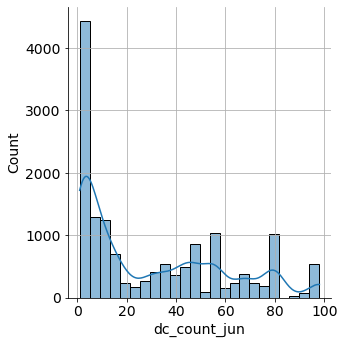

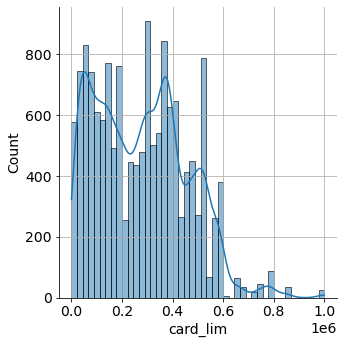

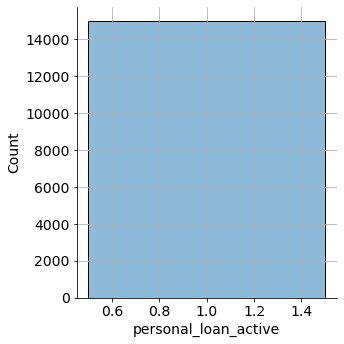

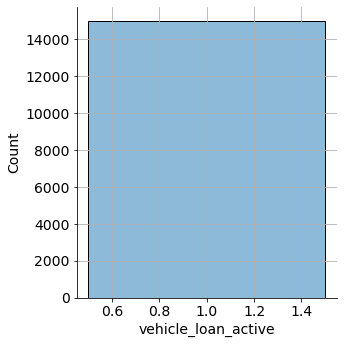

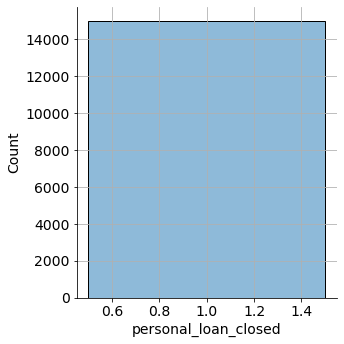

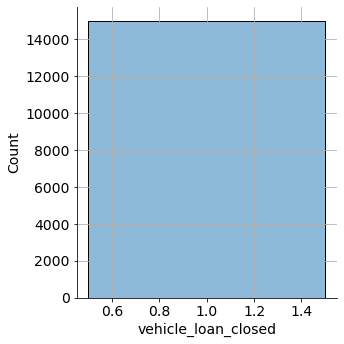

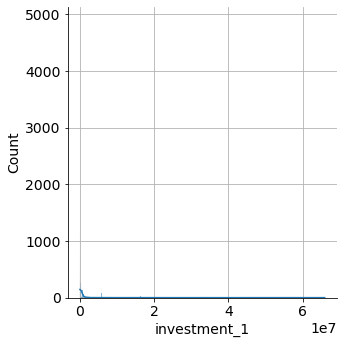

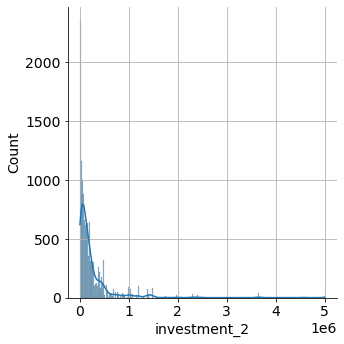

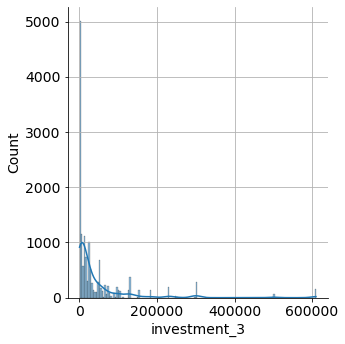

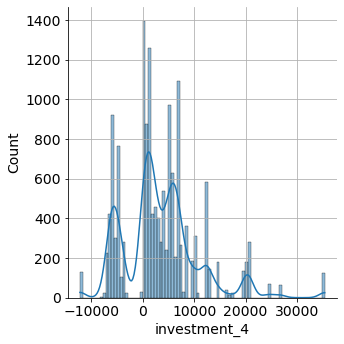

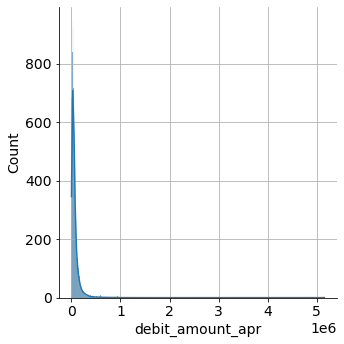

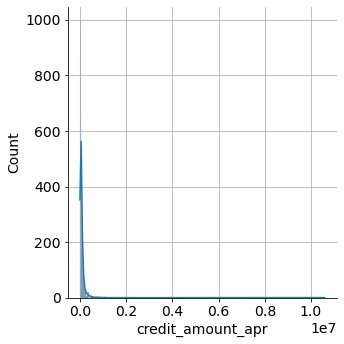

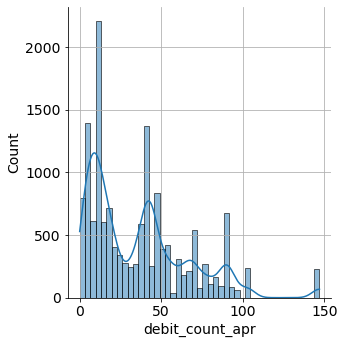

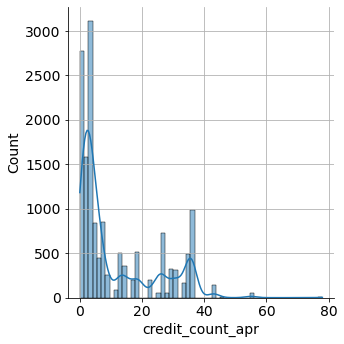

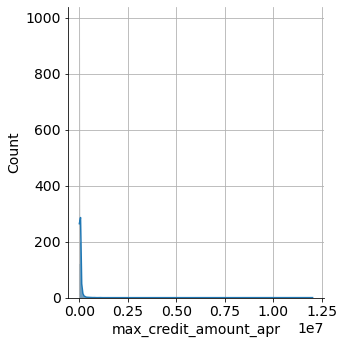

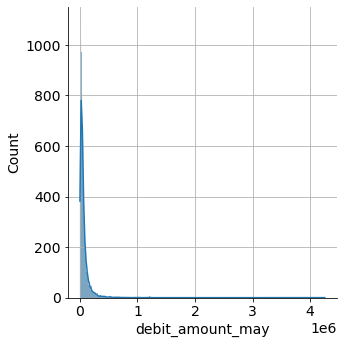

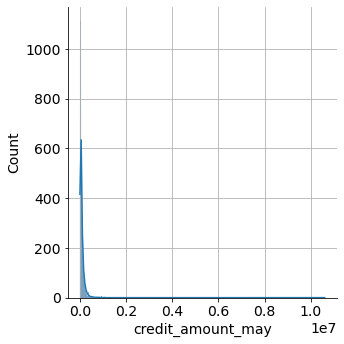

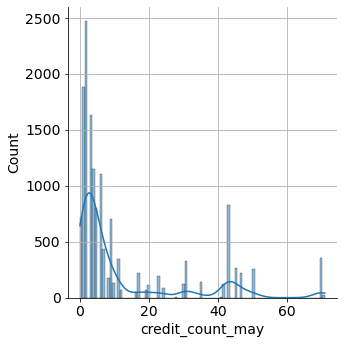

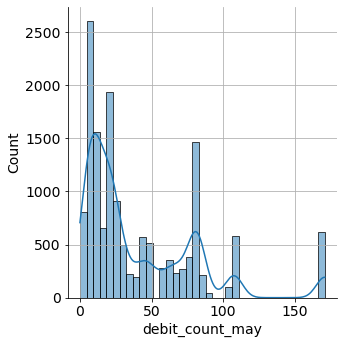

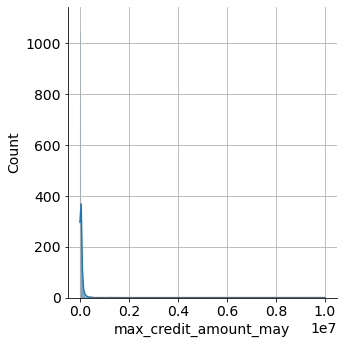

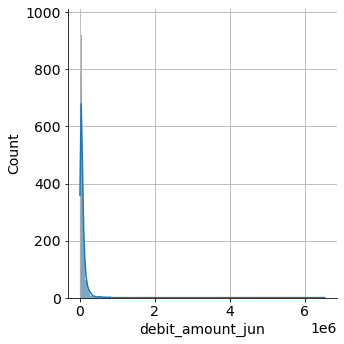

KeyboardInterrupt: 

In [78]:
for col in Cred_consumption_train_copy.columns:
    sns.displot(Cred_consumption_train_copy[col], kde = True)
    plt.show()

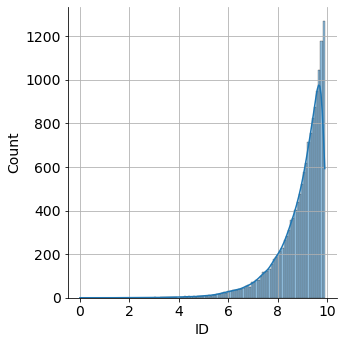

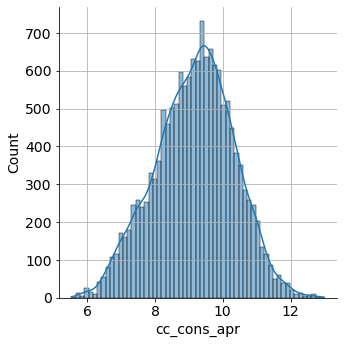

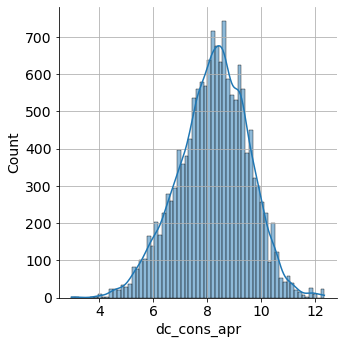

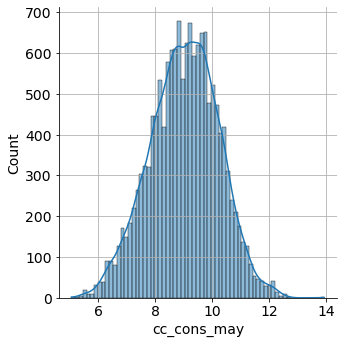

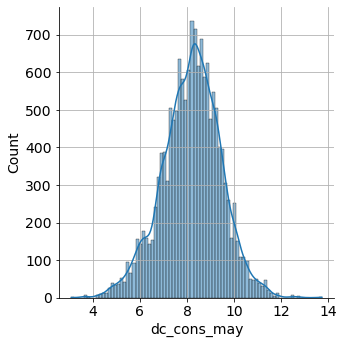

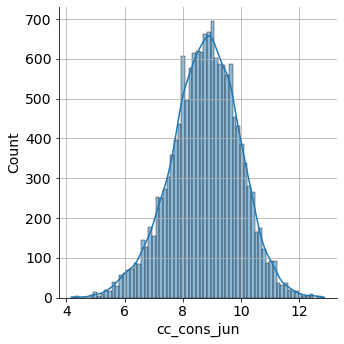

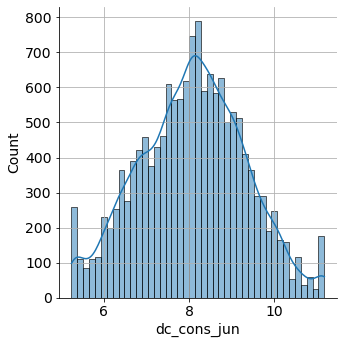

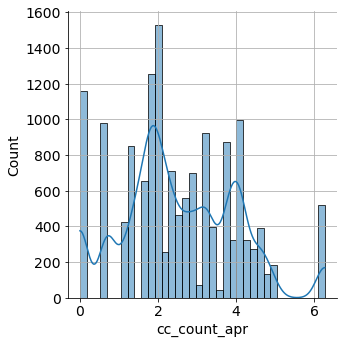

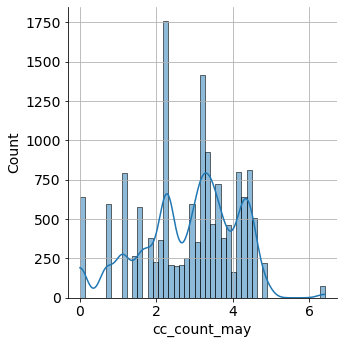

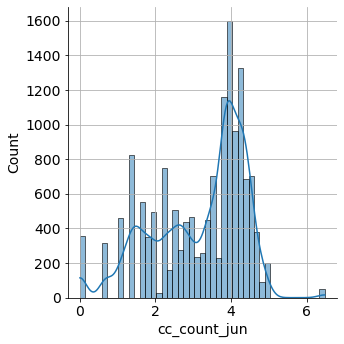

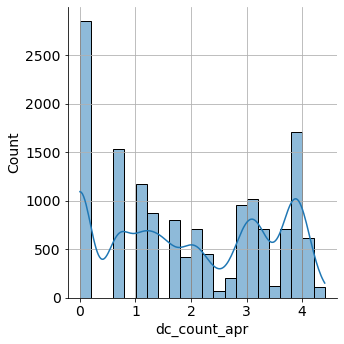

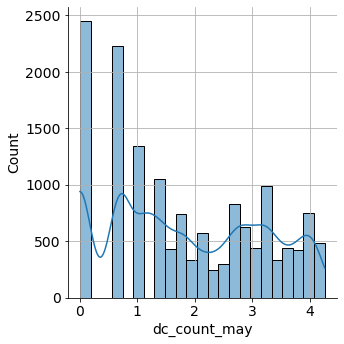

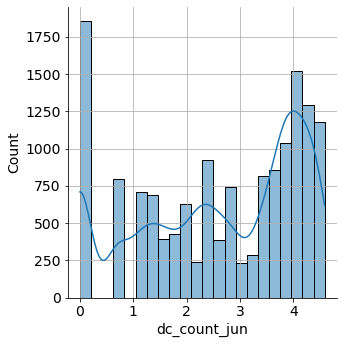

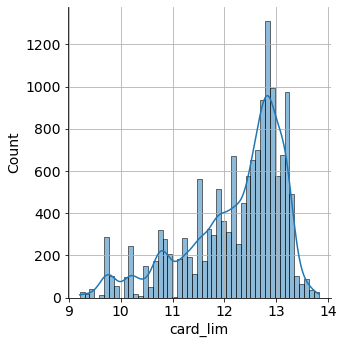

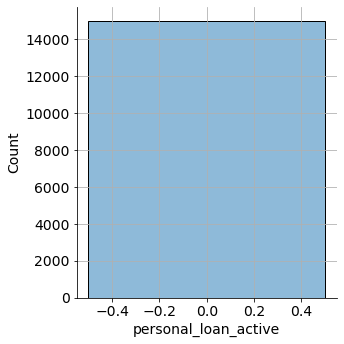

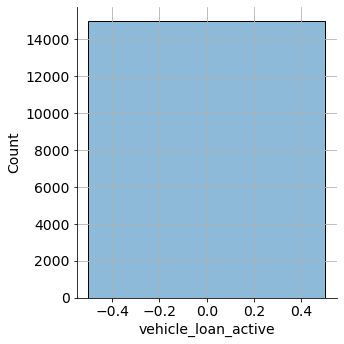

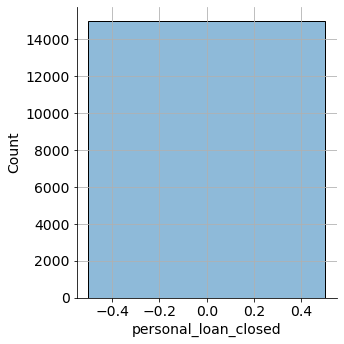

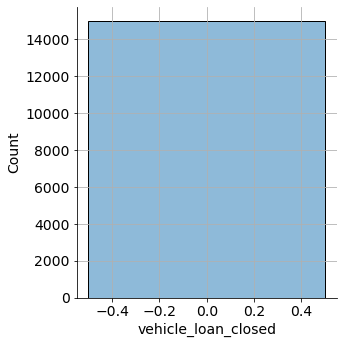

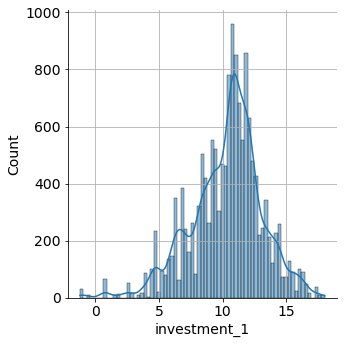

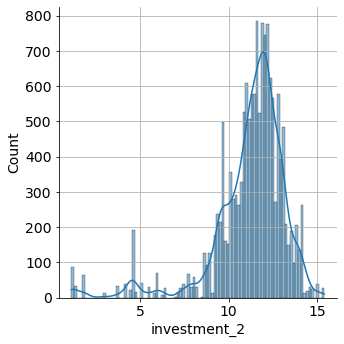

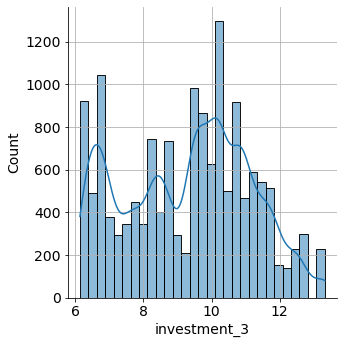

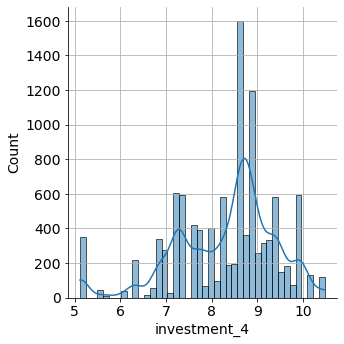

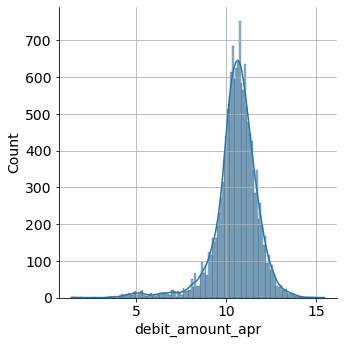

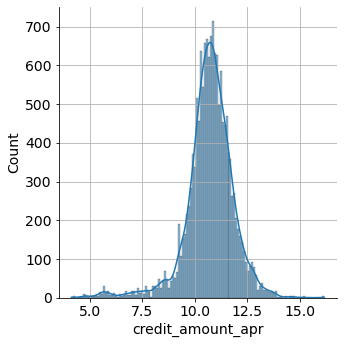

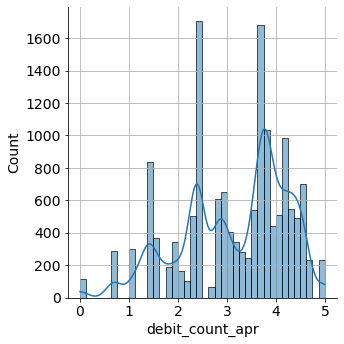

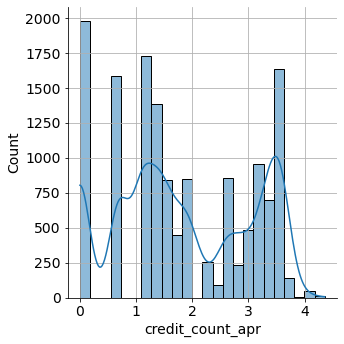

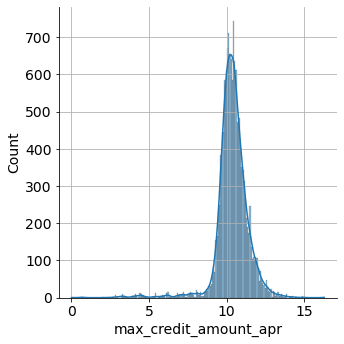

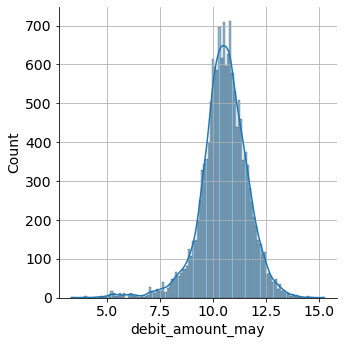

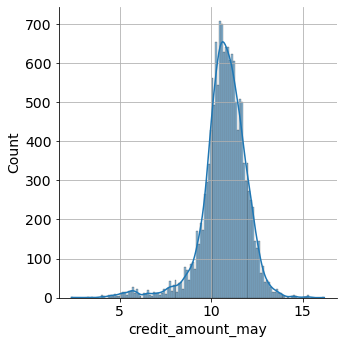

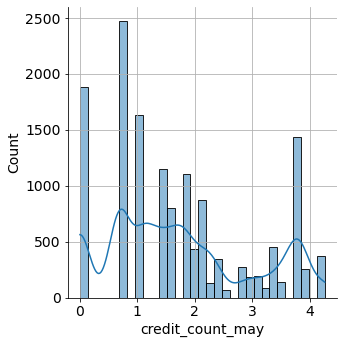

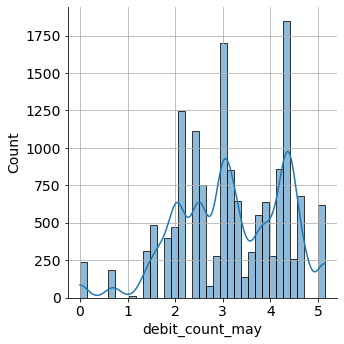

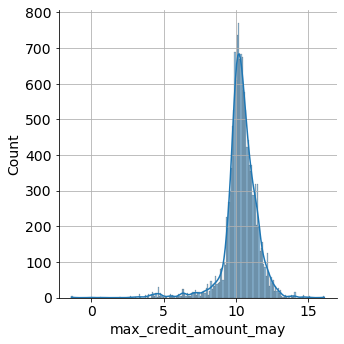

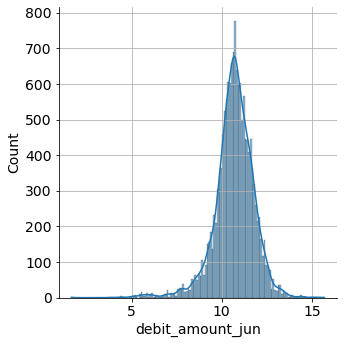

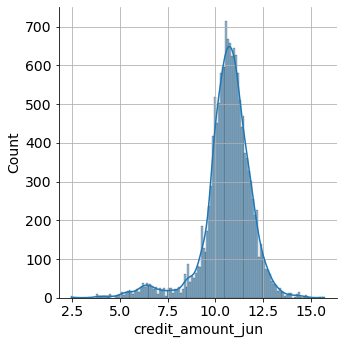

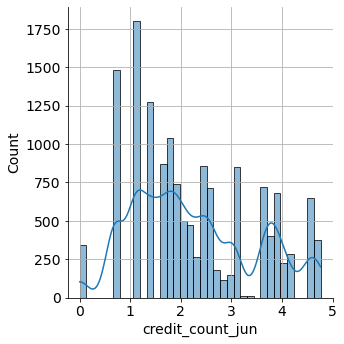

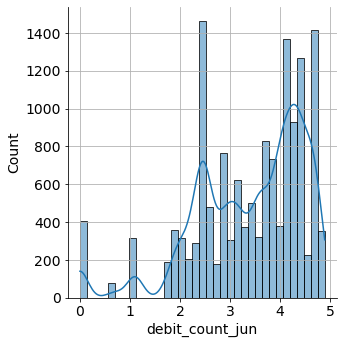

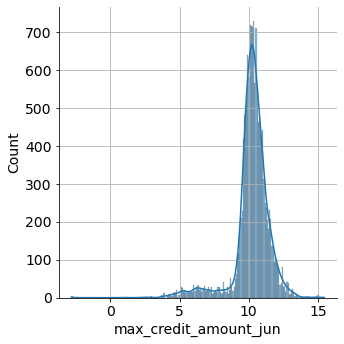

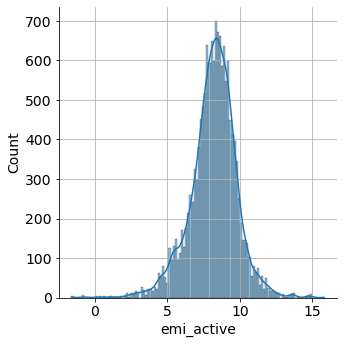

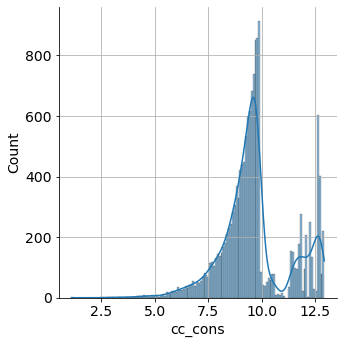

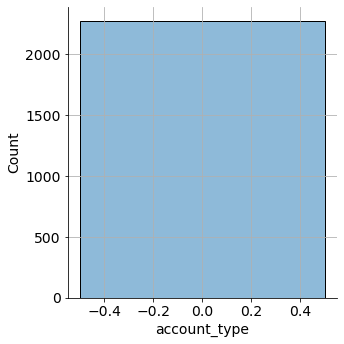

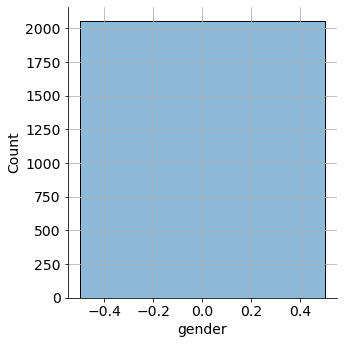

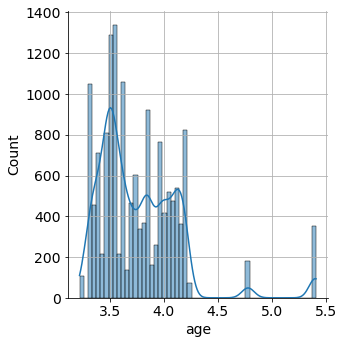

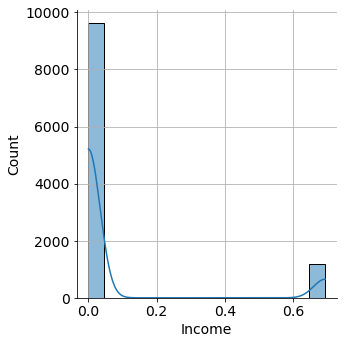

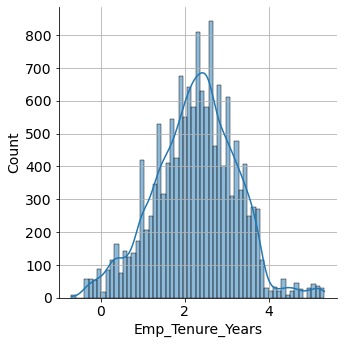

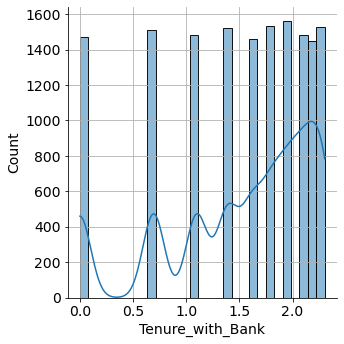

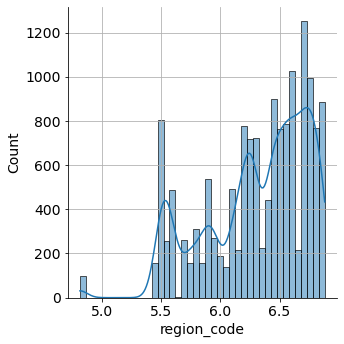

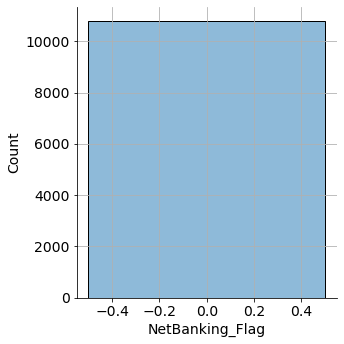

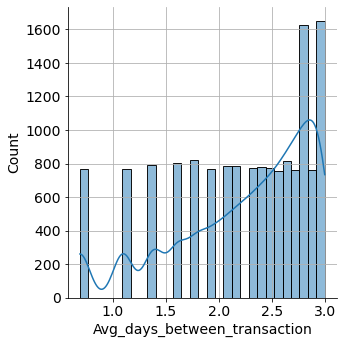

In [411]:
for col in Cred_consumption_train_copy.columns:
    sns.displot(np.log(Cred_consumption_train_copy[col]), kde = True)
    plt.show()

In [116]:
Cred_consumption_train_copy

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.200,130000.00,300500.0,12174.00000,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.00,3448.84,13434.0,0,0,30,1,7.0,5,956.0,1,20.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.000,3.00,610000.0,2351.00000,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.00,3812.69,449.0,0,0,37,0,10.2,8,966.0,1,5.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.000,176487.60,2156.0,3735.00000,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.00,9432.90,11968.0,0,0,33,1,3.9,3,505.0,1,15.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.000,63000.00,26241.0,0.00000,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.00,144.61,32029.0,0,0,63,0,25.8,6,631.0,0,15.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.200,7216.53,13873.0,-4679.00000,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.00,1887.89,16394.0,1,0,33,1,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,55,29,520000,1,1,1.0,1,186189.000,24000.00,16215.0,977.00000,30608.54,31135.00,79.0,2,27608.0,30501.77,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,78966.76,4263.0,0,1,53,0,13.2,9,653.0,1,20.0
14996,10376,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,1,2,472000,1,1,1.0,1,24832.000,221000.00,12337.0,-6281.37988,39903.00,23797.00,43.0,2,30512.0,57918.69,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,4762.10,11019.0,0,0,44,1,2.4,9,535.0,1,2.0
14997,2181,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,3,3,44000,1,1,1.0,1,180615.020,253000.00,25000.0,10210.00000,29525.63,95477.27,4.0,1,41085.0,25404.75,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,2877.33,404227.0,0,0,37,1,3.4,9,464.0,1,8.0
14998,18417,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,9,1,359000,1,1,1.0,1,3299447.136,393982.10,3975.0,-4664.00000,119370.54,59644.00,3.0,29,19110.0,46086.90,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,13006.84,28813.0,0,0,220,1,40.0,10,536.0,1,3.0


**We will be working on the data after converting our output variable to log value as it gives a better normally distributed curve:
**We will be converting our training data output variable to standardized logarithmic data where we will be finding the predicted values based on that.**

In [117]:
Cred_consumption_train_copy2 = Cred_consumption_train_copy.copy()

In [118]:
Cred_consumption_train_copy2

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.200,130000.00,300500.0,12174.00000,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.00,3448.84,13434.0,0,0,30,1,7.0,5,956.0,1,20.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.000,3.00,610000.0,2351.00000,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.00,3812.69,449.0,0,0,37,0,10.2,8,966.0,1,5.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.000,176487.60,2156.0,3735.00000,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.00,9432.90,11968.0,0,0,33,1,3.9,3,505.0,1,15.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.000,63000.00,26241.0,0.00000,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.00,144.61,32029.0,0,0,63,0,25.8,6,631.0,0,15.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.200,7216.53,13873.0,-4679.00000,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.00,1887.89,16394.0,1,0,33,1,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,55,29,520000,1,1,1.0,1,186189.000,24000.00,16215.0,977.00000,30608.54,31135.00,79.0,2,27608.0,30501.77,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,78966.76,4263.0,0,1,53,0,13.2,9,653.0,1,20.0
14996,10376,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,1,2,472000,1,1,1.0,1,24832.000,221000.00,12337.0,-6281.37988,39903.00,23797.00,43.0,2,30512.0,57918.69,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,4762.10,11019.0,0,0,44,1,2.4,9,535.0,1,2.0
14997,2181,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,3,3,44000,1,1,1.0,1,180615.020,253000.00,25000.0,10210.00000,29525.63,95477.27,4.0,1,41085.0,25404.75,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,2877.33,404227.0,0,0,37,1,3.4,9,464.0,1,8.0
14998,18417,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,9,1,359000,1,1,1.0,1,3299447.136,393982.10,3975.0,-4664.00000,119370.54,59644.00,3.0,29,19110.0,46086.90,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,13006.84,28813.0,0,0,220,1,40.0,10,536.0,1,3.0


In [119]:
Cred_consumption_train_copy2 = Cred_consumption_train_copy2.drop(columns = 'ID')

In [120]:
Cred_consumption_train_copy2.isna().sum()

cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    1
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            1
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3                    2
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 1
credit_count_apr                0
max_credit_amount_apr           0
debit_amount_may                0
credit_amount_may               0
credit_count_may                0
debit_count_ma

**Taking out the variables which shows no or least variation in the data points.**

In [121]:
list = []
for i in Cred_consumption_train_copy2.columns:
    if (len(Cred_consumption_train_copy2[i].unique()) == 1):
        list.append(i)
        print(i, Cred_consumption_train_copy2[i].unique())
        
print(list)

personal_loan_active [1]
vehicle_loan_active [1]
vehicle_loan_closed [1]
['personal_loan_active', 'vehicle_loan_active', 'vehicle_loan_closed']


In [122]:
Cred_consumption_train_copy2 = Cred_consumption_train_copy2.drop(columns = ['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'])

In [123]:
def fill_miss_values(x):
    x = x.fillna(x.median())
    return x

In [124]:
Cred_consumption_train_copy2 = Cred_consumption_train_copy2.apply(fill_miss_values)

In [125]:
Cred_consumption_train_copy2

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,331.200,130000.00,300500.0,12174.00000,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.00,3448.84,13434.0,0,0,30,1,7.0,5,956.0,1,20.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,5809950.000,3.00,610000.0,2351.00000,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.00,3812.69,449.0,0,0,37,0,10.2,8,966.0,1,5.0
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,27324.000,176487.60,2156.0,3735.00000,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.00,9432.90,11968.0,0,0,33,1,3.9,3,505.0,1,15.0
3,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,370776.000,63000.00,26241.0,0.00000,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.00,144.61,32029.0,0,0,63,0,25.8,6,631.0,0,15.0
4,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,10006.200,7216.53,13873.0,-4679.00000,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.00,1887.89,16394.0,1,0,33,1,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,55,29,520000,186189.000,24000.00,16215.0,977.00000,30608.54,31135.00,79.0,2,27608.0,30501.77,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,78966.76,4263.0,0,1,53,0,13.2,9,653.0,1,20.0
14996,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,1,2,472000,24832.000,221000.00,12337.0,-6281.37988,39903.00,23797.00,43.0,2,30512.0,57918.69,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,4762.10,11019.0,0,0,44,1,2.4,9,535.0,1,2.0
14997,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,3,3,44000,180615.020,253000.00,25000.0,10210.00000,29525.63,95477.27,4.0,1,41085.0,25404.75,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,2877.33,404227.0,0,0,37,1,3.4,9,464.0,1,8.0
14998,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,9,1,359000,3299447.136,393982.10,3975.0,-4664.00000,119370.54,59644.00,3.0,29,19110.0,46086.90,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,13006.84,28813.0,0,0,220,1,40.0,10,536.0,1,3.0


In [126]:
Cred_consumption_train_copy2['ln_cc_cons'] = np.log(Cred_consumption_train_copy2.cc_cons)

In [127]:
Cred_consumption_train_copy2 = Cred_consumption_train_copy2.drop(columns = 'cc_cons')

***Due to the transition to logarithmic values some values especially 1 is changed to infinite values so we have to convert them back to 1 otherwise we will get errors while doing variable reduction techniques.***

In [128]:
np.isfinite(Cred_consumption_train_copy2.ln_cc_cons).nunique()

2

In [129]:
Cred_consumption_train_copy2 = Cred_consumption_train_copy2.replace((np.inf, -np.inf), 1).reset_index(drop=True)

In [130]:
Cred_consumption_train_copy_final = Cred_consumption_train_copy2.copy()
Cred_consumption_train_copy_final = Cred_consumption_train_copy_final.drop(columns = 'ln_cc_cons')

<AxesSubplot:>

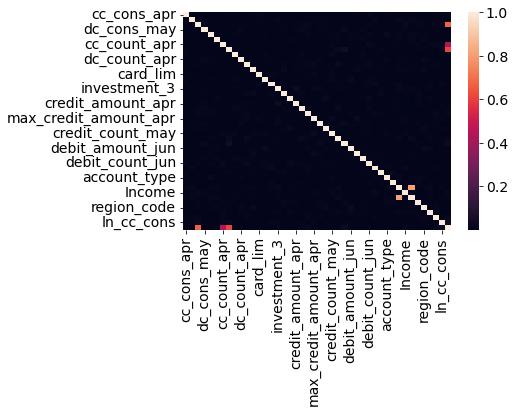

In [422]:
sns.heatmap(Cred_consumption_train_copy2.corr().abs())

In [131]:
Cred_consumption_train_copy_final.corrwith(Cred_consumption_train_copy2['ln_cc_cons']).abs().sort_values(ascending = False)

cc_cons_may                     0.024738
cc_count_may                    0.022619
cc_count_apr                    0.015935
investment_2                    0.014421
max_credit_amount_apr           0.014238
debit_amount_jun                0.011602
Avg_days_between_transaction    0.011588
Emp_Tenure_Years                0.011296
investment_3                    0.011279
debit_count_apr                 0.010057
credit_amount_apr               0.009870
cc_cons_apr                     0.009818
age                             0.009170
dc_cons_apr                     0.008410
credit_amount_may               0.008351
max_credit_amount_may           0.008262
region_code                     0.008050
credit_count_jun                0.007917
debit_amount_apr                0.007509
cc_cons_jun                     0.007092
dc_cons_jun                     0.007036
debit_count_jun                 0.006938
card_lim                        0.006308
account_type                    0.005541
Tenure_with_Bank

In [132]:
Cred_consumption_train_copy2.isna().sum()

cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_apr                0
max_credit_amount_apr           0
debit_amount_may                0
credit_amount_may               0
credit_count_may                0
debit_count_may                 0
max_credit_amount_may           0
debit_amount_jun                0
credit_amount_jun               0
credit_count_j

**Checking the collinearity between the independent variables and we will be using the Forward selection/Backward elimination method to select the features as it is much more intuitive to get the model with a more general behaviour.**
**We want as least as possible the number of variables which are truly explaining the Interest rate.**
***Backward Elimination Technique:***
***Eliminating the variables level-wise based on Variable Inflation Factor scores and checking the VIF values at each level.*** 

In [144]:
D = Cred_consumption_train_copy2.drop(columns = 'ln_cc_cons')

In [135]:
D_new = pd.Series(variance_inflation_factor(D.values,i) for i in range(len(D.columns)))

In [136]:
vif_data = pd.concat([pd.Series(D.columns),D_new], axis = 1)

In [137]:
vif_data.columns = ['features','VIF']

In [138]:
vif_data.sort_values(by = 'VIF', ascending = False)

,features,VIF
35,age,9.457885
39,region_code,6.875895
41,Avg_days_between_transaction,4.561631
37,Emp_Tenure_Years,4.468604
38,Tenure_with_Bank,4.289598
40,NetBanking_Flag,3.357687
12,card_lim,3.200638
36,Income,2.860268
30,debit_count_jun,2.537808
19,debit_count_apr,2.328339


In [148]:
vif_data.columns = ['features','VIF']

In [149]:
vif_data = vif_data.sort_values(by = 'VIF', ascending = False)

In [150]:
vif_data

,features,VIF
35,age,9.457885
39,region_code,6.875895
41,Avg_days_between_transaction,4.561631
37,Emp_Tenure_Years,4.468604
38,Tenure_with_Bank,4.289598
40,NetBanking_Flag,3.357687
12,card_lim,3.200638
36,Income,2.860268
30,debit_count_jun,2.537808
19,debit_count_apr,2.328339


In [ ]:
vif_data.features

In [420]:
#To get the impact of variables on the final output variable, we need to make a hypothesis.

#Y = B1X1 + B2X2 + B3X3 + B4X4.........#Linear mathematical equatio


#Null hypothesis: The variables does not have any impact on the final output variable. B1 = B2 = B3 = B4 ....= 0
#Alternate hypothesis: The variables have an impact on the final output variable. p-value < 0.05, so that we can reject the null hypothesis.
                      #B1 != B2 != b3 != B4 ... != 0
#p-value < 0.05
#Confidence Interval: 95%

In [262]:
formula = 'ln_cc_cons~cc_count_may+cc_cons_may+cc_count_apr'

In [263]:
ols_copy_model = smf.ols(formula, data = Cred_consumption_train_copy2).fit()

In [264]:
#We will be eliminating the variables one by one based on p-values as we want the p-value < 0.05.
print(ols_copy_model.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_cc_cons   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.858
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           0.000130
Time:                        18:02:44   Log-Likelihood:                -28430.
No. Observations:               15000   AIC:                         5.687e+04
Df Residuals:                   14996   BIC:                         5.690e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.6068      0.019    515.238   

# Model Evaluation metric

In [266]:
#Predicting the credit consumption values for the training data.
p_value = ols_copy_model.predict(Cred_consumption_train_copy2)
Cred_consumption_train_copy2['pvalue'] = p_value

In [281]:
Model_data = Cred_consumption_train_copy2[['ln_cc_cons','pvalue']]

In [284]:
#Converting the log values back to the original format using numpy exponential function.
Model_data['cc_cons'] = np.exp(Model_data['ln_cc_cons'])
Model_data['pred_val'] = np.exp(Model_data['pvalue'])

**Validating the model using the Root Mean Square Percentage Error between the predicted credit card consumption and the actual given credit consumption.**

In [288]:
Model_data = Model_data.drop(columns = 'percent_error')

In [290]:
Model_data['abs_error'] = np.abs(Model_data['cc_cons'] - Model_data['pred_val'])

In [385]:
Model_data['squared_percent_error'] = Model_data['percent_error']*Model_data['percent_error']

In [389]:
Model_data

,ln_cc_cons,pvalue,cc_cons,pred_val,abs_error,percent_error,squared_percent_error
0,9.505544,9.610799,13434.0,14925.086208,1491.086208,0.110993,0.012320
1,6.107023,9.658883,449.0,15660.285831,15211.285831,33.878142,1147.728516
2,9.389992,9.680253,11968.0,15998.544801,4030.544801,0.336777,0.113419
3,10.374397,9.629689,32029.0,15209.705427,16819.294573,0.525127,0.275758
4,9.704671,9.622733,16394.0,15104.279893,1289.720107,0.078670,0.006189
...,...,...,...,...,...,...,...
14995,8.357728,9.643129,4263.0,15415.506682,11152.506682,2.616117,6.844068
14996,9.307376,9.655035,11019.0,15600.137213,4581.137213,0.415749,0.172847
14997,12.909732,9.637337,404227.0,15326.477302,388900.522698,0.962084,0.925607
14998,10.268582,9.764185,28813.0,17399.303712,11413.696288,0.396130,0.156919


In [391]:
MSPE = Model_data['squared_percent_error'].mean()
MSPE

6551.022236616743

In [392]:
RMSPE = np.sqrt(MSPE)

In [393]:
RMSPE

80.93838543371582

# Predicting the Credit card consumption for the test dataset.

In [414]:
test_model_pred = ols_copy_model.predict(Cred_consumption_test)

In [418]:
Credit_consumption_test = np.exp(test_model_pred).round(2)

In [419]:
Credit_consumption_test 

15000    15094.75
15001    15000.02
15002    15229.64
15003    16820.45
15004    15036.68
           ...   
19995    14907.07
19996    15874.24
19997    15852.83
19998    14885.18
19999    14910.94
Length: 5000, dtype: float64